In [393]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np
import seaborn
pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

students = pd.read_csv('stud_math.csv')

In [394]:
students

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [466]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              395 non-null    object 
 4   famsize              395 non-null    object 
 5   Pstatus              395 non-null    object 
 6   Medu                 395 non-null    float64
 7   Fedu                 395 non-null    float64
 8   Mjob                 395 non-null    object 
 9   Fjob                 395 non-null    object 
 10  reason               395 non-null    object 
 11  guardian             395 non-null    object 
 12  traveltime           395 non-null    float64
 13  studytime            395 non-null    float64
 14  failures             395 non-null    float64
 15  schoolsup            395 non-null    obj

В данном дата сете имеем 13 числовых столбцов и 17 строковых.

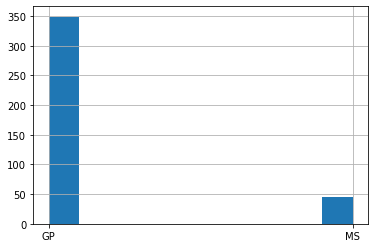

In [396]:
students.school.hist()

In [397]:
pd.DataFrame(students.school.value_counts())

,school
GP,349
MS,46


Этот слобец показывает количество учеников в 2 школах. 349 и 46 соответсвенно. Пропусков нет.

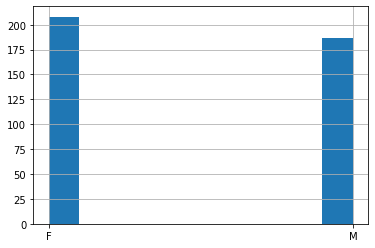

In [398]:
students.sex.hist()

In [399]:
pd.DataFrame(students.sex.value_counts())

,sex
F,208
M,187


In [400]:
Распределение по полу примерно одинаковое. Пропусков нет

SyntaxError: invalid syntax (<ipython-input-400-4bbd54abd074>, line 1)

In [ ]:
pd.DataFrame(students.address.value_counts())

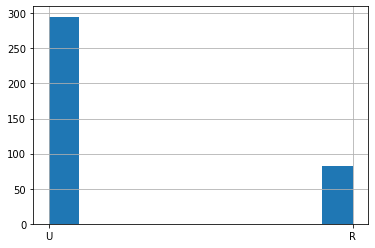

In [401]:
students.address.hist()

Большая часть студентов живет в городе.В этом столбце имеются пропуски заполним их c сохранением пропорции.

In [402]:
mask = students["address"].isna()
# считаем статистику распределения значений
p = students["address"].value_counts() / len(students["address"].dropna())
# заполняем пропуски с вероятностью `p`
students.loc[mask, "address"] = \
    np.random.choice(p.index.to_list(),
                     size=mask.sum(),
                     p=p.to_list())

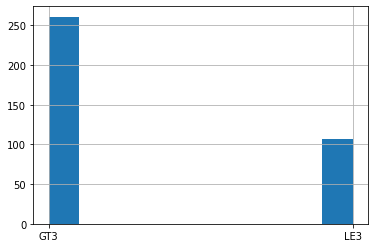

In [403]:
students.famsize.hist()

In [404]:
pd.DataFrame(students.famsize.value_counts())

,famsize
GT3,261
LE3,107


In [405]:
mask = students["famsize"].isna()
# считаем статистику распределения значений
p = students["famsize"].value_counts() / len(students["famsize"].dropna())
# заполняем пропуски с вероятностью `p`
students.loc[mask, "famsize"] = \
    np.random.choice(p.index.to_list(),
                     size=mask.sum(),
                     p=p.to_list())

In [406]:
pd.DataFrame(students.Pstatus.value_counts())

,Pstatus
T,314
A,36


In [407]:
mask = students["Pstatus"].isna()
# считаем статистику распределения значений
p = students["Pstatus"].value_counts() / len(students["Pstatus"].dropna())
# заполняем пропуски с вероятностью `p`
students.loc[mask, "Pstatus"] = \
    np.random.choice(p.index.to_list(),
                     size=mask.sum(),
                     p=p.to_list())

In [408]:
pd.DataFrame(students.Medu.value_counts())

,Medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


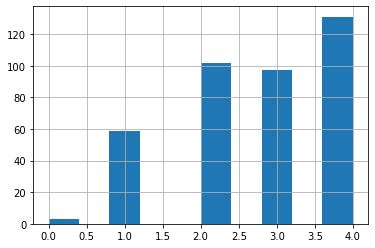

In [409]:
students.Medu.hist()

In [410]:
mask = students["Medu"].isna()
# считаем статистику распределения значений
p = students["Medu"].value_counts() / len(students["Medu"].dropna())
# заполняем пропуски с вероятностью `p`
students.loc[mask, "Medu"] = \
    np.random.choice(p.index.to_list(),
                     size=mask.sum(),
                     p=p.to_list())

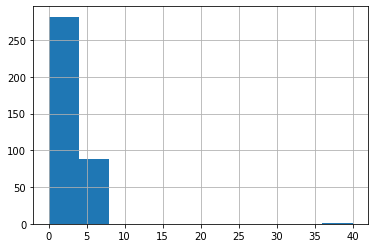

In [411]:
students.Fedu.hist()

In [412]:
pd.DataFrame(students.Fedu.value_counts())

,Fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


In [413]:
mask = students["Fedu"].isna()
# считаем статистику распределения значений
p = students["Fedu"].value_counts() / len(students["Fedu"].dropna())
# заполняем пропуски с вероятностью `p`
students.loc[mask, "Fedu"] = \
    np.random.choice(p.index.to_list(),
                     size=mask.sum(),
                     p=p.to_list())

А этом столбце меется выборс, значение выше максимально возможного. Скорее всего это опечатка и должно быть 4.0. Заменим значение

In [414]:
students.Fedu = students.Fedu.replace(40.0, 4.0)

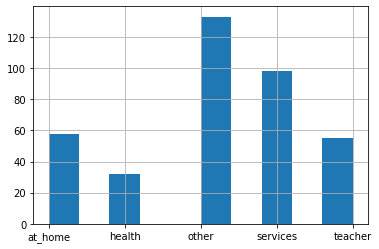

In [415]:
students.Mjob.hist()

In [416]:
mask = students["Mjob"].isna()
# считаем статистику распределения значений
p = students["Mjob"].value_counts() / len(students["Mjob"].dropna())
# заполняем пропуски с вероятностью `p`
students.loc[mask, "Mjob"] = \
    np.random.choice(p.index.to_list(),
                     size=mask.sum(),
                     p=p.to_list())

In [417]:
mask = students["Fjob"].isna()
# считаем статистику распределения значений
p = students["Fjob"].value_counts() / len(students["Fjob"].dropna())
# заполняем пропуски с вероятностью `p`
students.loc[mask, "Fjob"] = \
    np.random.choice(p.index.to_list(),
                     size=mask.sum(),
                     p=p.to_list())

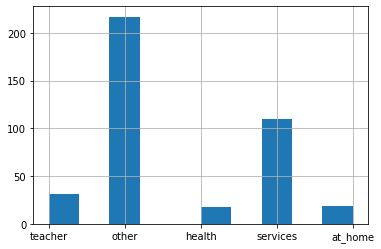

In [418]:
students.Fjob.hist()

In [419]:
mask = students["reason"].isna()
# считаем статистику распределения значений
p = students["reason"].value_counts() / len(students["reason"].dropna())
# заполняем пропуски с вероятностью `p`
students.loc[mask, "reason"] = \
    np.random.choice(p.index.to_list(),
                     size=mask.sum(),
                     p=p.to_list())

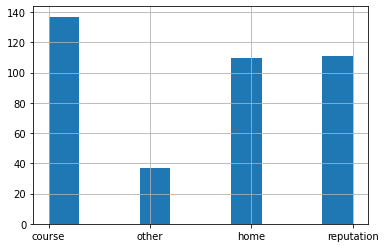

In [420]:
students.reason.hist()

In [421]:
mask = students["guardian"].isna()
# считаем статистику распределения значений
p = students["guardian"].value_counts() / len(students["guardian"].dropna())
# заполняем пропуски с вероятностью `p`
students.loc[mask, "guardian"] = \
    np.random.choice(p.index.to_list(),
                     size=mask.sum(),
                     p=p.to_list())

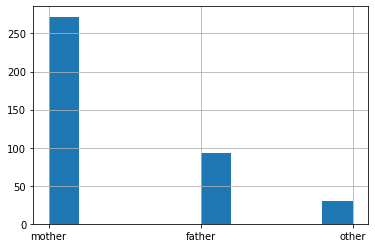

In [422]:
students.guardian.hist()

In [423]:
mask = students["traveltime"].isna()
# считаем статистику распределения значений
p = students["traveltime"].value_counts(
) / len(students["traveltime"].dropna())
# заполняем пропуски с вероятностью `p`
students.loc[mask, "traveltime"] = \
    np.random.choice(p.index.to_list(),
                     size=mask.sum(),
                     p=p.to_list())

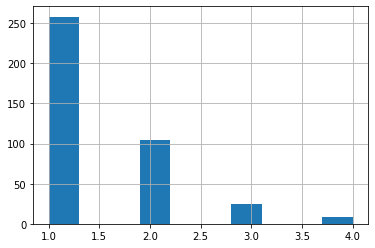

In [424]:
students.traveltime.hist()

In [425]:
mask = students["studytime"].isna()
# считаем статистику распределения значений
p = students["studytime"].value_counts() / len(students["studytime"].dropna())
# заполняем пропуски с вероятностью `p`
students.loc[mask, "studytime"] = \
    np.random.choice(p.index.to_list(),
                     size=mask.sum(),
                     p=p.to_list())

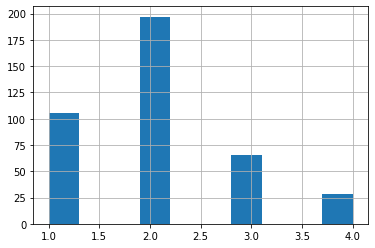

In [426]:
students.studytime.hist()

In [427]:
mask = students["failures"].isna()
# считаем статистику распределения значений
p = students["failures"].value_counts() / len(students["failures"].dropna())
# заполняем пропуски с вероятностью `p`
students.loc[mask, "failures"] = \
    np.random.choice(p.index.to_list(),
                     size=mask.sum(),
                     p=p.to_list())

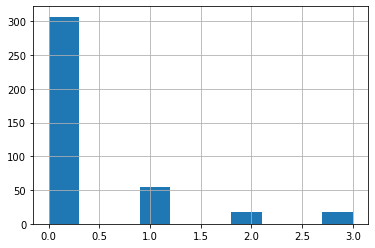

In [428]:
students.failures.hist()

In [429]:
mask = students["schoolsup"].isna()
# считаем статистику распределения значений
p = students["schoolsup"].value_counts() / len(students["schoolsup"].dropna())
# заполняем пропуски с вероятностью `p`
students.loc[mask, "schoolsup"] = \
    np.random.choice(p.index.to_list(),
                     size=mask.sum(),
                     p=p.to_list())

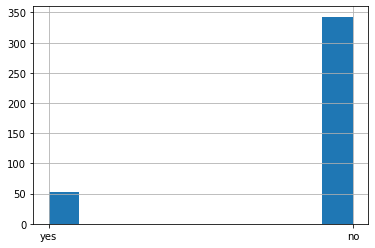

In [430]:
students.schoolsup.hist()

In [431]:
mask = students["famsup"].isna()
# считаем статистику распределения значений
p = students["famsup"].value_counts() / len(students["famsup"].dropna())
# заполняем пропуски с вероятностью `p`
students.loc[mask, "famsup"] = \
    np.random.choice(p.index.to_list(),
                     size=mask.sum(),
                     p=p.to_list())

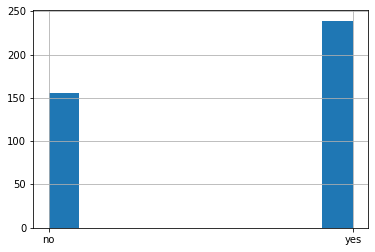

In [432]:
students.famsup.hist()

In [433]:
mask = students["paid"].isna()
# считаем статистику распределения значений
p = students["paid"].value_counts() / len(students["paid"].dropna())
# заполняем пропуски с вероятностью `p`
students.loc[mask, "paid"] = \
    np.random.choice(p.index.to_list(),
                     size=mask.sum(),
                     p=p.to_list())

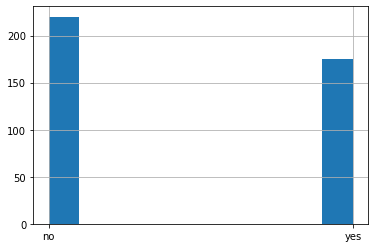

In [434]:
students.paid.hist()

In [435]:
mask = students["activities"].isna()
# считаем статистику распределения значений
p = students["activities"].value_counts(
) / len(students["activities"].dropna())
# заполняем пропуски с вероятностью `p`
students.loc[mask, "activities"] = \
    np.random.choice(p.index.to_list(),
                     size=mask.sum(),
                     p=p.to_list())

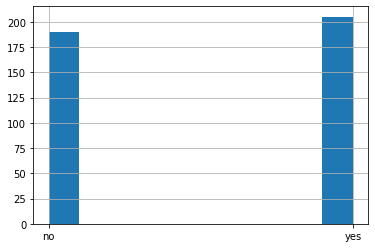

In [436]:
students.activities.hist()

In [437]:
mask = students["nursery"].isna()
# считаем статистику распределения значений
p = students["nursery"].value_counts() / len(students["nursery"].dropna())
# заполняем пропуски с вероятностью `p`
students.loc[mask, "nursery"] = \
    np.random.choice(p.index.to_list(),
                     size=mask.sum(),
                     p=p.to_list())

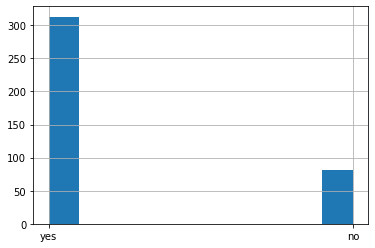

In [438]:
students.nursery.hist()

In [439]:
mask = students["studytime, granular"].isna()
# считаем статистику распределения значений
p = students["studytime, granular"].value_counts(
) / len(students["studytime, granular"].dropna())
# заполняем пропуски с вероятностью `p`
students.loc[mask, "studytime, granular"] = \
    np.random.choice(p.index.to_list(),
                     size=mask.sum(),
                     p=p.to_list())

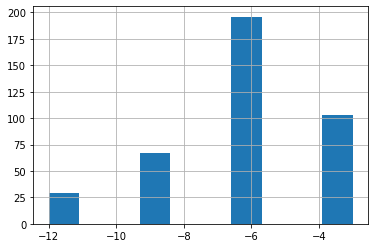

In [440]:
students["studytime, granular"].hist()

In [441]:
mask = students["higher"].isna()
# считаем статистику распределения значений
p = students["higher"].value_counts() / len(students["higher"].dropna())
# заполняем пропуски с вероятностью `p`
students.loc[mask, "higher"] = \
    np.random.choice(p.index.to_list(),
                     size=mask.sum(),
                     p=p.to_list())

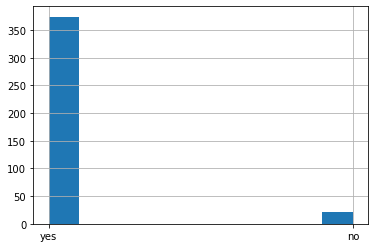

In [442]:
students["higher"].hist()

In [443]:
mask = students["internet"].isna()
# считаем статистику распределения значений
p = students["internet"].value_counts() / len(students["internet"].dropna())
# заполняем пропуски с вероятностью `p`
students.loc[mask, "internet"] = \
    np.random.choice(p.index.to_list(),
                     size=mask.sum(),
                     p=p.to_list())

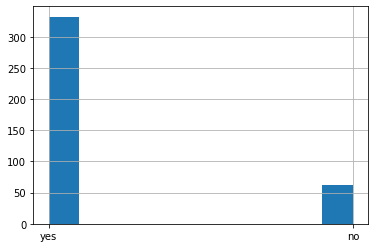

In [444]:
students["internet"].hist()

In [445]:
mask = students["romantic"].isna()
# считаем статистику распределения значений
p = students["romantic"].value_counts() / len(students["romantic"].dropna())
# заполняем пропуски с вероятностью `p`
students.loc[mask, "romantic"] = \
    np.random.choice(p.index.to_list(),
                     size=mask.sum(),
                     p=p.to_list())

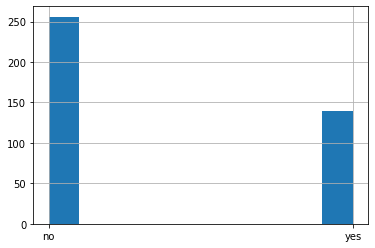

In [446]:
students["romantic"].hist()

In [447]:
mask = students["famrel"].isna()
# считаем статистику распределения значений
p = students["famrel"].value_counts() / len(students["famrel"].dropna())
# заполняем пропуски с вероятностью `p`
students.loc[mask, "famrel"] = \
    np.random.choice(p.index.to_list(),
                     size=mask.sum(),
                     p=p.to_list())

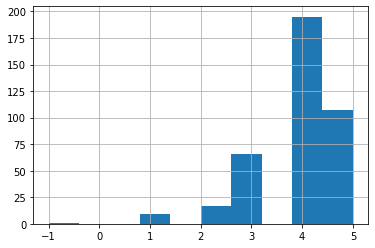

In [448]:
students["famrel"].hist()

In [449]:
pd.DataFrame(students.famrel.value_counts())

,famrel
4.0,195
5.0,107
3.0,66
2.0,17
1.0,9
-1.0,1


In [450]:
students.famrel = students.famrel.replace(-1.0, 1)

In [451]:
mask = students["freetime"].isna()
# считаем статистику распределения значений
p = students["freetime"].value_counts() / len(students["freetime"].dropna())
# заполняем пропуски с вероятностью `p`
students.loc[mask, "freetime"] = \
    np.random.choice(p.index.to_list(),
                     size=mask.sum(),
                     p=p.to_list())

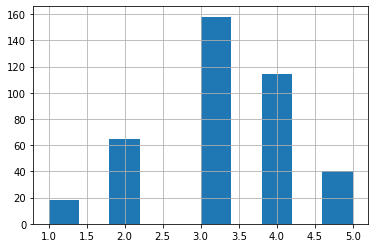

In [452]:
students["freetime"].hist()

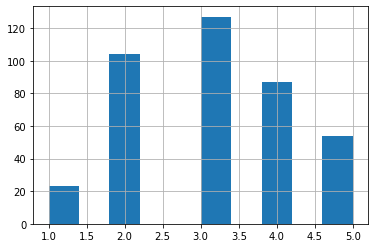

In [453]:
mask = students["goout"].isna()
# считаем статистику распределения значений
p = students["goout"].value_counts() / len(students["goout"].dropna())
# заполняем пропуски с вероятностью `p`
students.loc[mask, "goout"] = \
    np.random.choice(p.index.to_list(),
                     size=mask.sum(),
                     p=p.to_list())
students["goout"].hist()

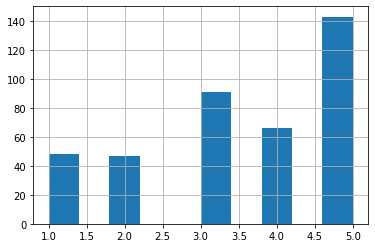

In [454]:
mask = students["health"].isna()
# считаем статистику распределения значений
p = students["health"].value_counts() / len(students["health"].dropna())
# заполняем пропуски с вероятностью `p`
students.loc[mask, "health"] = \
    np.random.choice(p.index.to_list(),
                     size=mask.sum(),
                     p=p.to_list())
students["health"].hist()

In [455]:
pd.DataFrame(students.absences.value_counts())

,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


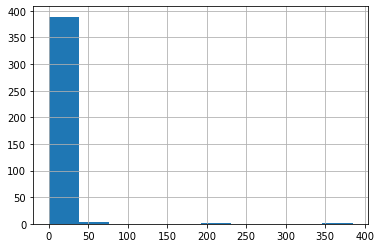

In [456]:
mask = students["absences"].isna()
# считаем статистику распределения значений
p = students["absences"].value_counts() / len(students["absences"].dropna())
# заполняем пропуски с вероятностью `p`
students.loc[mask, "absences"] = \
    np.random.choice(p.index.to_list(),
                     size=mask.sum(),
                     p=p.to_list())
students["absences"].hist()

Медианой для данного столбца будет значние 4. Заменим все выбросы на 4. Выбросы значение выше медианы +1.5*IQR т.е больше 12

In [457]:
students.absences = students.absences.apply(lambda x: x if x < 12 else 4)

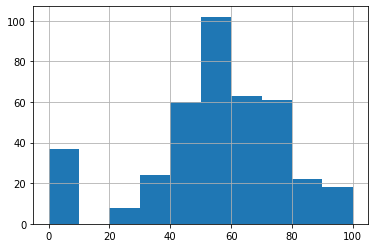

In [458]:
mask = students["score"].isna()
# считаем статистику распределения значений
p = students["score"].value_counts() / len(students["score"].dropna())
# заполняем пропуски с вероятностью `p`
students.loc[mask, "score"] = \
    np.random.choice(p.index.to_list(),
                     size=mask.sum(),
                     p=p.to_list())
students["score"].hist()

In [459]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=students.loc[students.loc[:, column].isin(
                    students.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

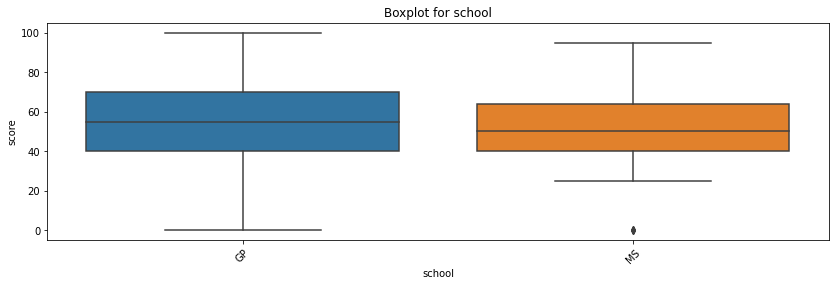

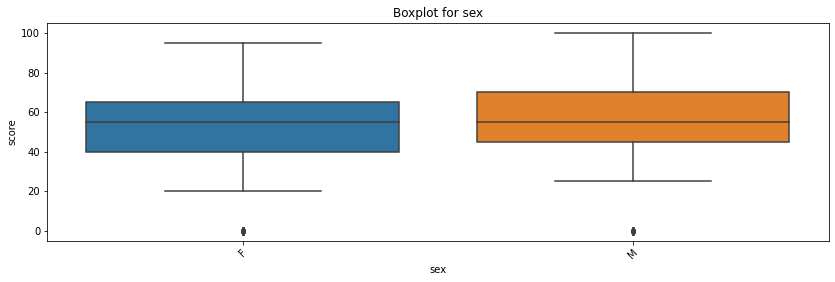

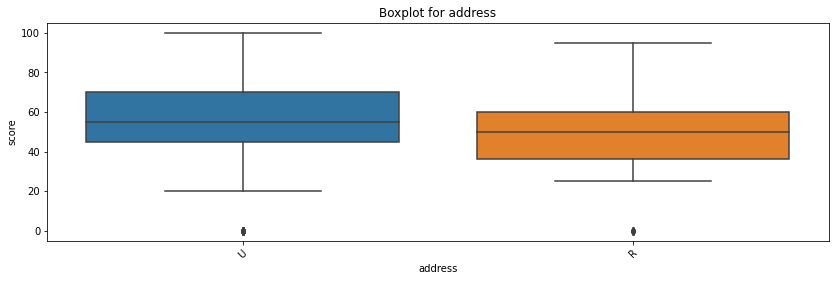

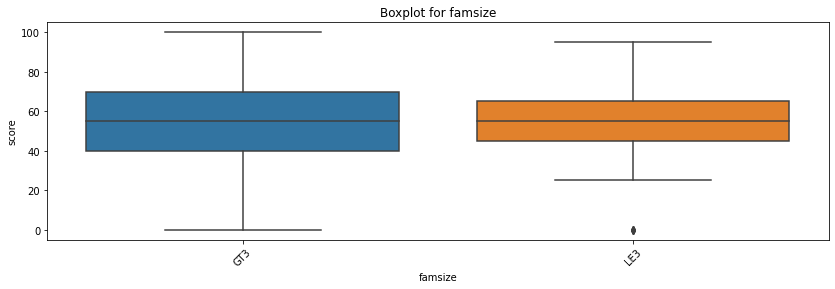

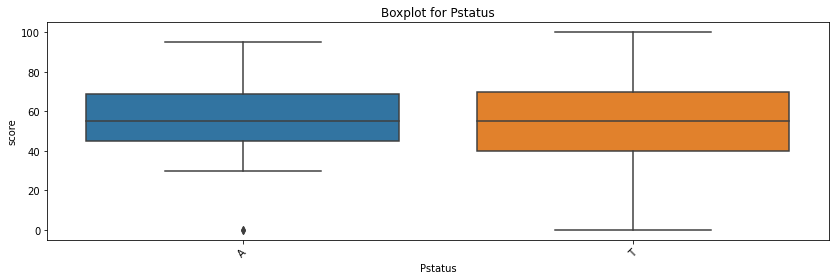

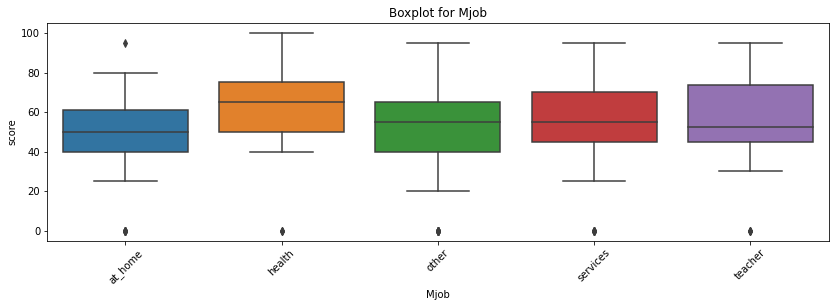

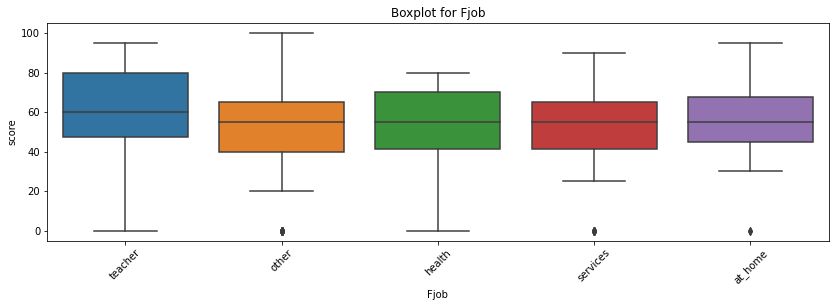

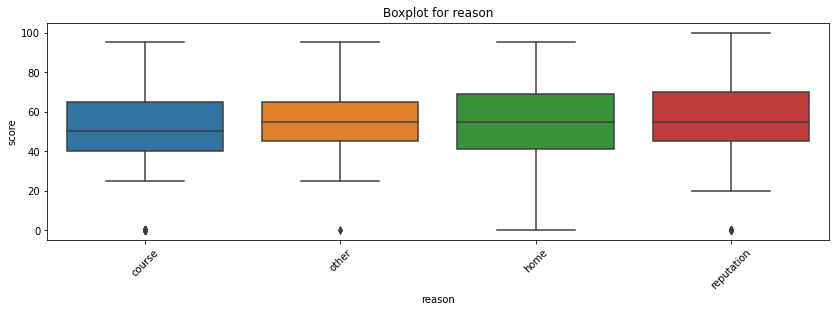

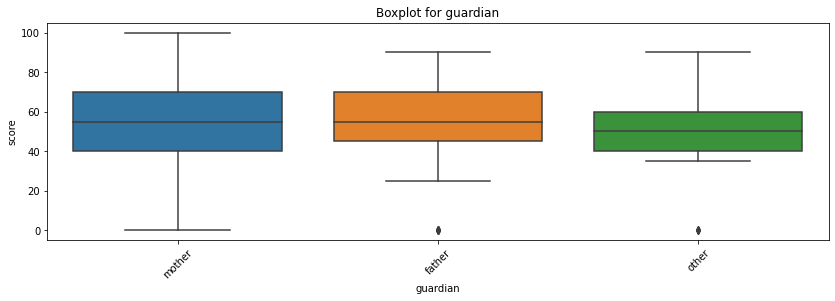

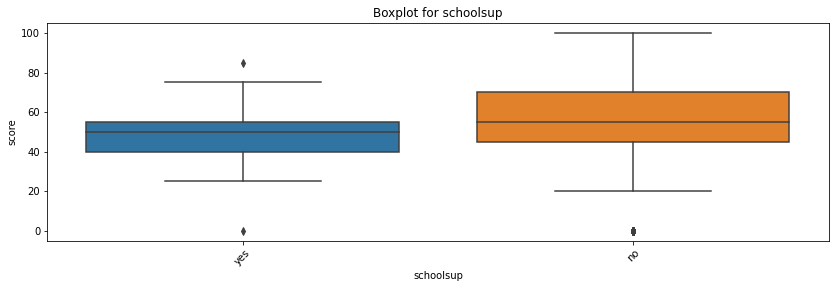

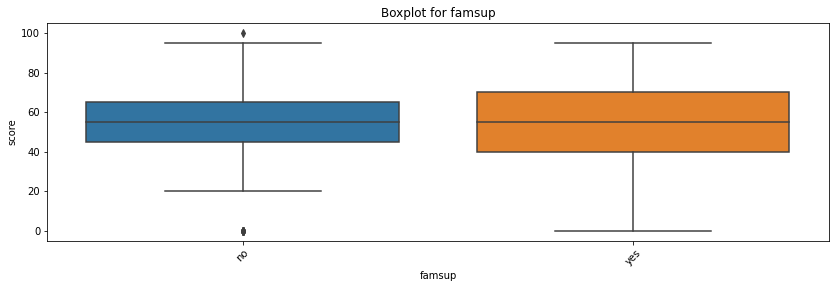

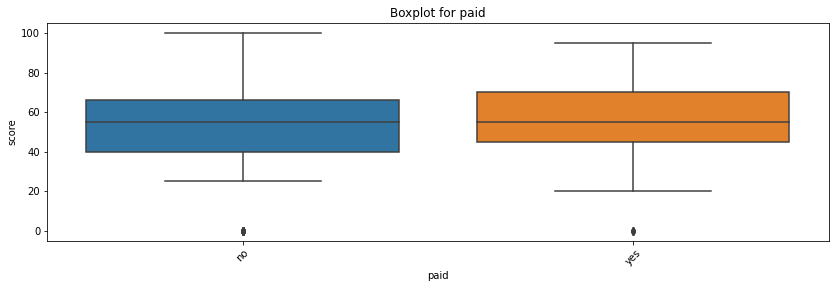

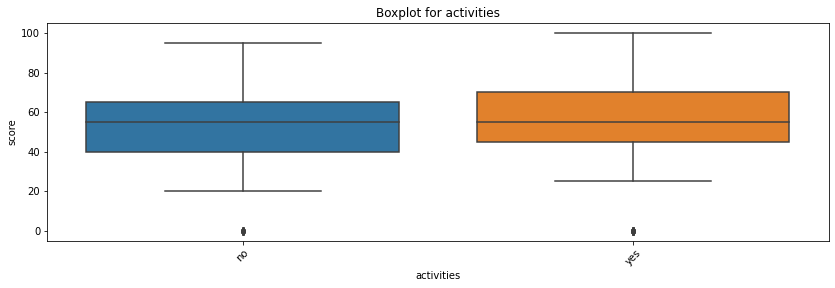

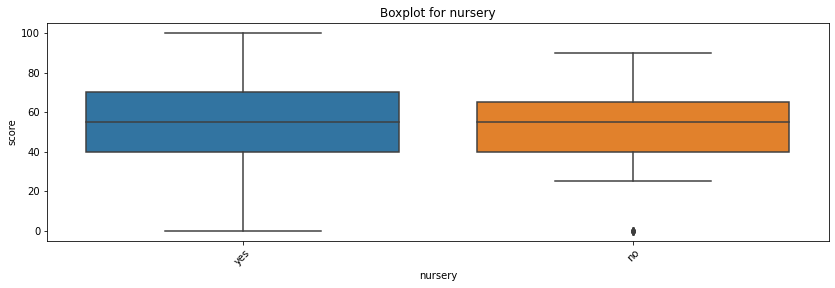

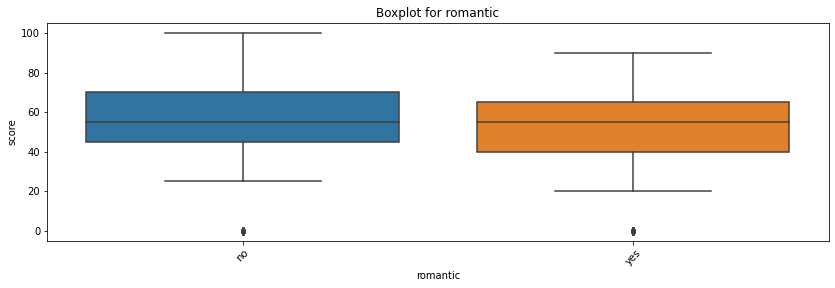

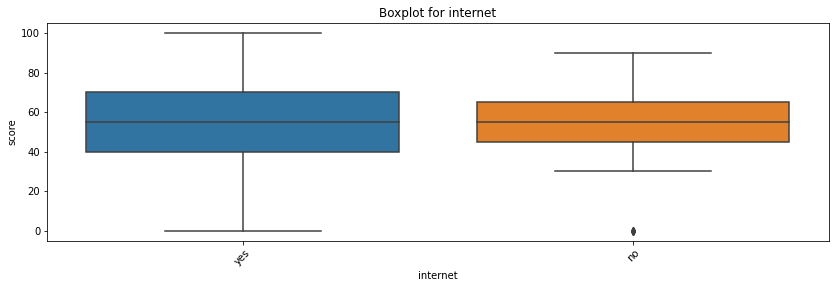

In [460]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'romantic', 'internet']:
    get_boxplot(col)

In [461]:
def get_stat_dif(column):
    cols = students.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(students.loc[students.loc[:, column] == comb[0], 'score'],
                     students.loc[students.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [462]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'romantic', 'internet']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки romantic


In [463]:
students.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.156999,-0.147174,0.051003,-0.016804,0.252668,0.024136,0.071785,0.024525,0.139763,-0.079158,0.044254,-0.153720
Medu,-0.156999,1.000000,0.570210,-0.142571,0.076828,-0.218016,-0.085972,0.002827,0.013442,0.042331,-0.050639,0.098757,0.214970
Fedu,-0.147174,0.570210,1.000000,-0.119734,-0.009567,-0.223406,0.001757,-0.017419,-0.042740,0.019148,0.029128,0.027912,0.129852
traveltime,0.051003,-0.142571,-0.119734,1.000000,-0.081849,0.025486,0.075866,0.021116,-0.035900,0.034479,-0.031449,-0.000025,-0.046688
studytime,-0.016804,0.076828,-0.009567,-0.081849,1.000000,-0.153168,-0.975449,0.049029,-0.135301,-0.047813,-0.082836,0.030941,0.114448
failures,0.252668,-0.218016,-0.223406,0.025486,-0.153168,1.000000,0.164507,0.004006,0.108812,0.105235,0.049135,-0.022299,-0.327317
"studytime, granular",0.024136,-0.085972,0.001757,0.075866,-0.975449,0.164507,1.000000,-0.066192,0.117700,0.041348,0.091272,-0.032124,-0.121791
famrel,0.071785,0.002827,-0.017419,0.021116,0.049029,0.004006,-0.066192,1.000000,0.129597,0.073409,0.093842,-0.051867,0.059942
freetime,0.024525,0.013442,-0.042740,-0.035900,-0.135301,0.108812,0.117700,0.129597,1.000000,0.283790,0.058218,0.000772,0.004829
goout,0.139763,0.042331,0.019148,0.034479,-0.047813,0.105235,0.041348,0.073409,0.283790,1.000000,-0.037076,0.096056,-0.136507


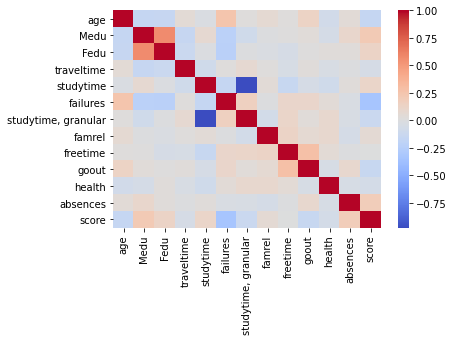

In [464]:
seaborn.heatmap(students.corr(), cmap='coolwarm')

Выводы:на значение итоговой оценки по математики влияют все параметры, больше всего address и romantic.